In [1]:
from compress import *

Rysowanie skompresowanej macierzy dla k = 2


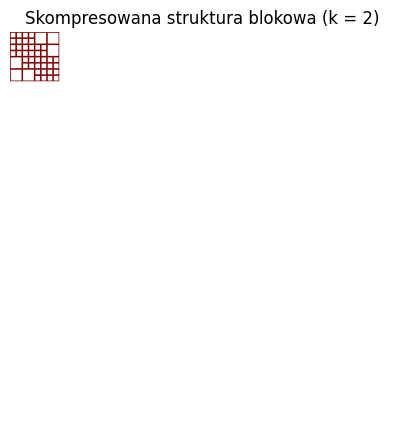

Rysowanie skompresowanej macierzy dla k = 3


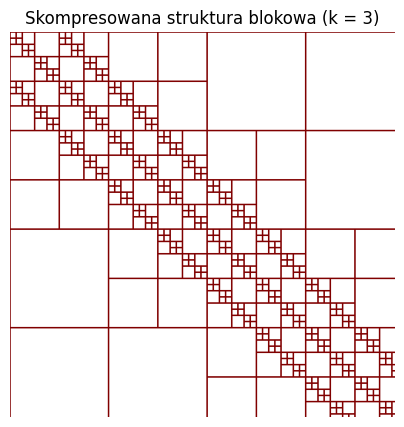

Rysowanie skompresowanej macierzy dla k = 4


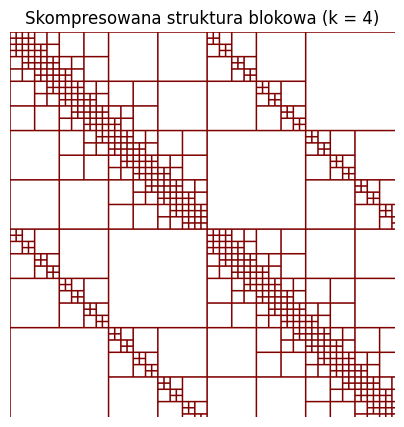

In [2]:
ks = [2, 3, 4]

r = 10
epsilon = 1e-6

for k in ks:
    print(f"Rysowanie skompresowanej macierzy dla k = {k}")
    
    # Generowanie macierzy 3D
    A = generate_3d_mesh_matrix(k)
    
    # Kompresja rekurencyjna
    tree = CompressMatrix(A, r, epsilon)
    
    # Rysowanie struktury blokowej
    img = draw_vis(tree)
    
    # Wyświetlenie
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Skompresowana struktura blokowa (k = {k})")
    plt.show()


Generacja dla k = 2 skonczona
Kompresja dla k = 2 skonczona
Generacja dla k = 3 skonczona
Kompresja dla k = 3 skonczona
Generacja dla k = 4 skonczona
Kompresja dla k = 4 skonczona


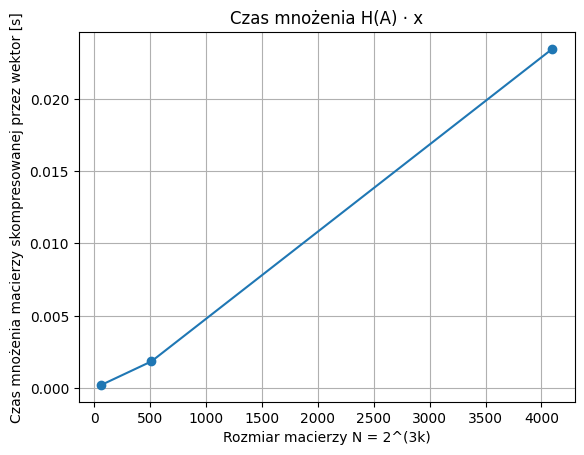

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

ks = [2, 3, 4]
r = 10
epsilon = 1e-6

sizes = []
times = []

for k in ks:
    A = generate_3d_mesh_matrix(k)
    print(f"Generacja dla k = {k} skonczona")
    
    # rekurencyjna kompresja
    tree = CompressMatrix(A, r, epsilon)
    
    N = A.shape[0]
    x = np.random.rand(N)
    print(f"Kompresja dla k = {k} skonczona")

    start = time.time()
    matrix_vector_mult(tree, x)
    end = time.time()
    
    sizes.append(N)
    times.append(end - start)

# wykres
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Rozmiar macierzy N = 2^(3k)")
plt.ylabel("Czas mnożenia macierzy skompresowanej przez wektor [s]")
plt.title("Czas mnożenia H(A) · x")
plt.grid(True)
plt.show()


Dopasowany model: t ≈ 9.279e-07 * N^1.219


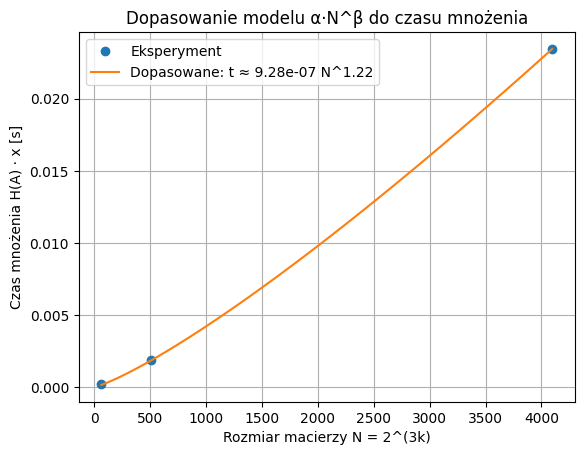

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# funkcja modelu
def power_law(N, alpha, beta):
    return alpha * N**beta

# dopasowanie krzywej
params, _ = curve_fit(power_law, sizes, times)
alpha, beta = params

print(f"Dopasowany model: t ≈ {alpha:.3e} * N^{beta:.3f}")

# rysunek: dane + dopasowana krzywa
N_fit = np.linspace(min(sizes), max(sizes), 100)
t_fit = power_law(N_fit, alpha, beta)

plt.figure()
plt.plot(sizes, times, 'o', label="Eksperyment")
plt.plot(N_fit, t_fit, '-', label=f"Dopasowane: t ≈ {alpha:.2e} N^{beta:.2f}")
plt.xlabel("Rozmiar macierzy N = 2^(3k)")
plt.ylabel("Czas mnożenia H(A) · x [s]")
plt.title("Dopasowanie modelu α·N^β do czasu mnożenia")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
import numpy as np

# parametry
k = 3
r = 10
epsilon = 1e-6

# generowanie macierzy i kompresja
A = generate_3d_mesh_matrix(k)
tree = CompressMatrix(A, r, epsilon)

# DEKONSTRUKCJA (rekonstrukcja macierzy gęstej)
A_dense = ReconstructMatrix(tree, A.shape)

# losowy wektor
x = np.random.rand(A.shape[0])

# mnożenie pełnej i skompresowanej macierzy przez wektor
Ax = A @ x
Hx = matrix_vector_mult(tree, x)

# suma różnicy kwadratów ||Ax − Hx||_2^2
error_sq = np.sum((Ax - Hx) ** 2)

print(f"||Ax − Hx||_2^2 = {error_sq:.6e}")


||Ax − Hx||_2^2 = 1.151552e-28


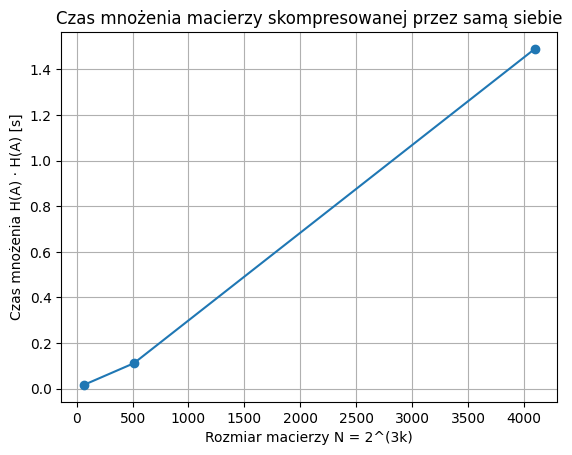

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt

ks = [2, 3, 4]
r = 10
epsilon = 1e-6

sizes = []
times = []

for k in ks:
    # generowanie macierzy siatki 3D
    A = generate_3d_mesh_matrix(k)
    
    # kompresja rekurencyjna
    tree = CompressMatrix(A, r, epsilon)
    
    N = A.shape[0]
    
    # pomiar czasu mnożenia H(A) * H(A)
    start = time.time()
    matrix_matrix_mult(tree, tree, r)
    end = time.time()
    
    sizes.append(N)
    times.append(end - start)

# wykres
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Rozmiar macierzy N = 2^(3k)")
plt.ylabel("Czas mnożenia H(A) · H(A) [s]")
plt.title("Czas mnożenia macierzy skompresowanej przez samą siebie")
plt.grid(True)
plt.show()


Dopasowany model: t(N) ≈ 4.961e-05 · N^1.239


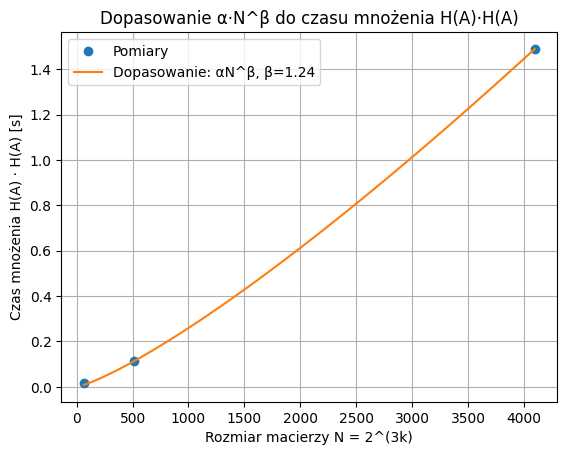

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# model potęgowy
def power_law(N, alpha, beta):
    return alpha * N**beta

# dopasowanie
params, _ = curve_fit(power_law, sizes, times)
alpha, beta = params

print(f"Dopasowany model: t(N) ≈ {alpha:.3e} · N^{beta:.3f}")

# wykres: dane + dopasowanie
N_fit = np.linspace(min(sizes), max(sizes), 200)
t_fit = power_law(N_fit, alpha, beta)

plt.figure()
plt.plot(sizes, times, 'o', label="Pomiary")
plt.plot(N_fit, t_fit, '-', label=f"Dopasowanie: αN^β, β={beta:.2f}")
plt.xlabel("Rozmiar macierzy N = 2^(3k)")
plt.ylabel("Czas mnożenia H(A) · H(A) [s]")
plt.title("Dopasowanie α·N^β do czasu mnożenia H(A)·H(A)")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
import numpy as np

# parametry
k = 2            # uwaga: dla k=3,4 A^2 jest już bardzo duża
r = 10
epsilon = 1e-6

# 1. generowanie macierzy gęstej
A = generate_3d_mesh_matrix(k)
N = A.shape[0]

# 2. kompresja
H = CompressMatrix(A, r, epsilon)

# 3. dokładne A^2 (gęste)
A2 = A @ A

# 4. H^2 (hierarchiczne)
H2_tree = matrix_matrix_mult(H, H, r)

# 5. dekonstrukcja H^2 do macierzy gęstej
H2_dense = ReconstructMatrix(H2_tree, A.shape)

# 6. suma różnicy kwadratów ||A^2 − H^2||_2^2
error_sq = np.sum((A2 - H2_dense) ** 2)

# (opcjonalnie) błąd względny
relative_error = np.linalg.norm(A2 - H2_dense) / np.linalg.norm(A2)

print(f"N = {N}")
print(f"||A^2 − H^2||_2^2 = {error_sq:.6e}")
print(f"Błąd względny = {relative_error:.6e}")


N = 64
||A^2 − H^2||_2^2 = 3.553128e+02
Błąd względny = 9.859749e-01
